# Single Season (2022 Season)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
go_back = '../data/'

2024-04-12 18:19:13.434852: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
game_stats = pd.read_csv(go_back + 'NBA Player Box Score Stats(1950 - 2022).csv')
#Just look at 2021-2022 Season
game_stats['GAME_DATE'] = pd.to_datetime(game_stats['GAME_DATE'])
game_stats = game_stats[(game_stats['GAME_DATE'] >= '2021-10-01') & (game_stats['GAME_DATE'] <= '2022-04-10')]
game_stats.sort_values('GAME_DATE', ascending = False).head()

/var/folders/36/2zgp4yys7db_z7vb6yx75ckw0000gn/T/ipykernel_2367/1400184769.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  game_stats['GAME_DATE'] = pd.to_datetime(game_stats['GAME_DATE'])


,Unnamed: 0,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
1276324,1243865,2022,22101223,Derrick White,BOS,2022-04-10,BOS @ MEM,W,20,3,...,3.0,4.0,3.0,0.0,0.0,0.0,0.0,8,16.0,1
1285441,330731,2022,22101216,Kevin Durant,BKN,2022-04-10,BKN vs. IND,W,41,5,...,10.0,10.0,16.0,1.0,0.0,6.0,0.0,20,10.0,1
1293726,1024296,2022,22101217,Terry Rozier,CHA,2022-04-10,CHA vs. WAS,W,32,10,...,3.0,3.0,6.0,0.0,0.0,1.0,2.0,25,6.0,1
1288018,942172,2022,22101217,Mason Plumlee,CHA,2022-04-10,CHA vs. WAS,W,21,4,...,7.0,8.0,2.0,0.0,2.0,2.0,3.0,8,-9.0,1
1280038,1087522,2022,22101217,Ish Smith,WAS,2022-04-10,WAS @ CHA,L,17,4,...,0.0,0.0,2.0,3.0,0.0,3.0,1.0,8,-18.0,1


In [3]:
game_stats.Team.unique()

array(['DEN', 'PHI', 'WAS', 'BOS', 'OKC', 'PHX', 'SAC', 'ORL', 'NYK',
       'CHI', 'HOU', 'LAC', 'GSW', 'POR', 'LAL', 'MIN', 'CHA', 'MIA',
       'BKN', 'DAL', 'MIL', 'ATL', 'UTA', 'IND', 'MEM', 'CLE', 'NOP',
       'SAS', 'DET', 'TOR'], dtype=object)

In [4]:
game_stats.columns

Index(['Unnamed: 0', 'Season', 'Game_ID', 'PLAYER_NAME', 'Team', 'GAME_DATE',
       'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [5]:
unique_teams = game_stats.Team.unique()
#Creates dictionsary for each player on every unique team
team_dataframes = {}
for team in unique_teams:
    team_df = game_stats[game_stats['Team'] == team].copy()
    team_dataframes[team] = team_df

team_dataframes['MIL']

,Unnamed: 0,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
1239242,951281,2021,22100258,Bobby Portis,MIL,2021-11-22,MIL vs. ORL,W,22,5,...,6.0,11.0,3.0,0.0,1.0,4.0,3.0,13,25.0,1
1239243,951282,2021,22100244,Bobby Portis,MIL,2021-11-20,MIL vs. ORL,W,34,8,...,12.0,15.0,0.0,0.0,1.0,0.0,0.0,24,3.0,1
1239244,951283,2021,22100234,Bobby Portis,MIL,2021-11-19,MIL vs. OKC,W,31,5,...,9.0,13.0,1.0,2.0,0.0,0.0,3.0,17,6.0,1
1239245,951284,2021,22100219,Bobby Portis,MIL,2021-11-17,MIL vs. LAL,W,29,8,...,2.0,5.0,2.0,1.0,1.0,3.0,1.0,17,7.0,1
1239246,951285,2021,22100193,Bobby Portis,MIL,2021-11-14,MIL @ ATL,L,32,5,...,8.0,8.0,3.0,1.0,0.0,1.0,4.0,11,-7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295767,758219,2022,22101183,Wesley Matthews,MIL,2022-04-05,MIL @ CHI,W,22,3,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,11,6.0,1
1295768,758218,2022,22101198,Wesley Matthews,MIL,2022-04-07,MIL vs. BOS,W,27,2,...,0.0,1.0,1.0,1.0,1.0,0.0,4.0,7,6.0,1
1295769,758217,2022,22101203,Wesley Matthews,MIL,2022-04-08,MIL @ DET,W,22,4,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9,26.0,1
1295774,758238,2022,22100836,Wesley Matthews,MIL,2022-02-10,MIL @ PHX,L,14,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3,-7.0,1


In [6]:
team_dataframes['MIL']['GAME_DATE'].unique()

<DatetimeArray>
['2021-11-22 00:00:00', '2021-11-20 00:00:00', '2021-11-19 00:00:00',
 '2021-11-17 00:00:00', '2021-11-14 00:00:00', '2021-11-12 00:00:00',
 '2021-11-10 00:00:00', '2021-11-09 00:00:00', '2021-11-07 00:00:00',
 '2021-11-05 00:00:00', '2021-11-24 00:00:00', '2021-11-26 00:00:00',
 '2021-12-01 00:00:00', '2021-12-10 00:00:00', '2021-12-08 00:00:00',
 '2021-12-06 00:00:00', '2021-11-28 00:00:00', '2021-12-04 00:00:00',
 '2021-10-27 00:00:00', '2021-10-31 00:00:00', '2021-11-02 00:00:00',
 '2021-12-02 00:00:00', '2021-12-30 00:00:00', '2021-12-28 00:00:00',
 '2021-12-25 00:00:00', '2021-12-15 00:00:00', '2021-12-13 00:00:00',
 '2021-12-12 00:00:00', '2021-10-19 00:00:00', '2021-12-17 00:00:00',
 '2021-12-18 00:00:00', '2021-12-22 00:00:00', '2021-12-23 00:00:00',
 '2021-10-30 00:00:00', '2021-10-25 00:00:00', '2021-10-23 00:00:00',
 '2021-10-21 00:00:00', '2022-04-07 00:00:00', '2022-04-03 00:00:00',
 '2022-01-17 00:00:00', '2022-01-01 00:00:00', '2022-01-03 00:00:00',
 '20

In [7]:
columns_to_sum = ['FGM', 'FGA', 'FG3M', 'FG3A', 
                  'FTM', 'FTA', 'OREB', 'DREB', 'REB', 
                  'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [8]:
#groups by team and date played for each unique team
team_daily_stats = {}
for df in team_dataframes:
    team_daily_stats_df = team_dataframes[df].groupby(['GAME_DATE', 'Team', 'WL'])[columns_to_sum].sum().reset_index()
    team_daily_stats_df['win'] = (team_daily_stats_df['WL'] == 'W').astype(int)
    team_daily_stats[df] = team_daily_stats_df.drop(['WL'], axis = 1)
team_daily_stats['LAL']

,GAME_DATE,Team,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,win
0,2021-10-19,LAL,45,95.0,15.0,42.0,9,19.0,5.0,40.0,45.0,21.0,7.0,4.0,17.0,25.0,114,0
1,2021-10-22,LAL,34,86.0,15.0,34.0,22,29.0,12.0,34.0,46.0,25.0,7.0,3.0,16.0,26.0,105,0
2,2021-10-24,LAL,45,84.0,16.0,30.0,15,22.0,9.0,27.0,36.0,29.0,10.0,12.0,17.0,14.0,121,1
3,2021-10-26,LAL,50,105.0,8.0,30.0,17,22.0,9.0,47.0,56.0,20.0,8.0,10.0,13.0,21.0,125,1
4,2021-10-27,LAL,46,92.0,11.0,35.0,12,14.0,10.0,30.0,40.0,29.0,8.0,2.0,17.0,22.0,115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-03,LAL,49,92.0,6.0,20.0,14,21.0,6.0,34.0,40.0,31.0,4.0,5.0,12.0,25.0,118,0
78,2022-04-05,LAL,39,86.0,9.0,29.0,23,30.0,7.0,39.0,46.0,22.0,7.0,3.0,16.0,14.0,110,0
79,2022-04-07,LAL,37,83.0,9.0,32.0,29,38.0,8.0,34.0,42.0,14.0,8.0,4.0,18.0,13.0,112,0
80,2022-04-08,LAL,41,82.0,9.0,31.0,29,39.0,7.0,38.0,45.0,23.0,8.0,4.0,9.0,17.0,120,1


In [9]:
#creates cumulative stats
team_cumsum_stats = {}
percentage_stats = ['FG', 'FG3', 'FT']
per_game_stats =  ['REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'win']
columns_to_sum = ['FGM', 'FGA', 'FG3M', 'FG3A', 
                  'FTM', 'FTA', 'OREB', 'DREB', 'REB', 
                  'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'win']
for df in team_daily_stats:
    #team_daily_stats_df = team_dataframes[df].groupby(['GAME_DATE', 'Team'])[columns_to_sum].sum().reset_index()
    accumulated_stats = team_daily_stats[df].groupby('Team')[columns_to_sum].cumsum()
    accumulated_stats.insert(0, 'GAME_DATE', team_daily_stats[df]['GAME_DATE'])
    accumulated_stats.insert(0, 'Team', team_daily_stats[df]['Team'])
    shifted_dates = list(accumulated_stats['GAME_DATE'].iloc[1:])
    accumulated_stats = accumulated_stats.iloc[:-1]
    accumulated_stats['shifted_date'] = shifted_dates
    
    for stat in percentage_stats:
        accumulated_stats[stat + '%'] = accumulated_stats[stat + 'M'] / accumulated_stats[stat + 'A']
    
    num_games = accumulated_stats.shape[0]
    for stat in per_game_stats:
        accumulated_stats[stat + '/G'] = accumulated_stats[stat] / np.arange(1, num_games + 1)
    
    accumulated_stats = accumulated_stats.rename(columns = {'win/G' : 'win%'})
    accumulated_stats = accumulated_stats.drop(columns_to_sum, axis = 1)

    team_cumsum_stats[df] = accumulated_stats

team_cumsum_stats['LAL']

,Team,GAME_DATE,shifted_date,FG%,FG3%,FT%,REB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,win%
0,LAL,2021-10-19,2021-10-22,0.473684,0.357143,0.473684,45.000000,21.000000,7.000000,4.000000,17.000000,25.000000,114.000000,0.000000
1,LAL,2021-10-22,2021-10-24,0.436464,0.394737,0.645833,45.500000,23.000000,7.000000,3.500000,16.500000,25.500000,109.500000,0.000000
2,LAL,2021-10-24,2021-10-26,0.467925,0.433962,0.657143,42.333333,25.000000,8.000000,6.333333,16.666667,21.666667,113.333333,0.333333
3,LAL,2021-10-26,2021-10-27,0.470270,0.397059,0.684783,45.750000,23.750000,8.000000,7.250000,15.750000,21.500000,116.250000,0.500000
4,LAL,2021-10-27,2021-10-29,0.476190,0.380117,0.707547,44.600000,24.800000,8.000000,6.200000,16.000000,21.600000,116.000000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,LAL,2022-04-01,2022-04-03,0.468430,0.349307,0.727326,43.961039,24.051948,7.727273,5.233766,13.909091,20.272727,111.506494,0.402597
77,LAL,2022-04-03,2022-04-05,0.469282,0.348941,0.726590,43.910256,24.141026,7.679487,5.230769,13.884615,20.333333,111.589744,0.397436
78,LAL,2022-04-05,2022-04-07,0.469088,0.348529,0.727273,43.936709,24.113924,7.670886,5.202532,13.911392,20.253165,111.569620,0.392405
79,LAL,2022-04-07,2022-04-08,0.468816,0.347747,0.728031,43.912500,23.987500,7.675000,5.187500,13.962500,20.162500,111.575000,0.387500


In [10]:
betting = pd.read_csv(go_back + 'betting.csv')
betting = betting[betting['season'] == 2022]
betting['date'] = pd.to_datetime(betting['date'])
betting.head()

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal
33316,2021-10-19,2022,Milwaukee,vs,Brooklyn,127,104,-125.0,105.0,233.5,-1.5,114.0
33317,2021-10-19,2022,LA Lakers,vs,Golden State,114,121,-160.0,140.0,226.5,-3.5,111.5
33318,2021-10-19,2022,Golden State,@,LA Lakers,121,114,140.0,-160.0,226.5,3.5,111.5
33319,2021-10-19,2022,Brooklyn,@,Milwaukee,104,127,105.0,-125.0,233.5,1.5,114.0
33320,2021-10-20,2022,New York,vs,Boston,138,134,-140.0,120.0,220.0,-2.5,112.5


In [11]:
# Outcome = 1 if 'team' wins, 0 if 'opponent' wins
win_loss = betting.copy()
win_loss['home'] = (win_loss['home/visitor'] == 'vs').astype(int)
win_loss['outcome'] = (win_loss['score'] > win_loss['opponentScore']).astype(int)
win_loss = win_loss[['date', 'team', 'opponent', 'home', 'outcome']] 
win_loss.head()

,date,team,opponent,home,outcome
33316,2021-10-19,Milwaukee,Brooklyn,1,1
33317,2021-10-19,LA Lakers,Golden State,1,0
33318,2021-10-19,Golden State,LA Lakers,0,1
33319,2021-10-19,Brooklyn,Milwaukee,0,0
33320,2021-10-20,New York,Boston,1,1


In [12]:
lookup = pd.read_json(go_back + 'nba_lookup_table.json', orient='index')
lookup.reset_index(inplace=True)
lookup.columns = ['Abbrv', 'Team Name']
lookup

,Abbrv,Team Name
0,ATL,Atlanta
1,BOS,Boston
2,BRK,Brooklyn
3,CHI,Chicago
4,CHO,Charlotte
5,CLE,Cleveland
6,DAL,Dallas
7,DEN,Denver
8,DET,Detroit
9,GSW,Golden State


In [13]:
all_teams_df = pd.concat(team_cumsum_stats.values(), ignore_index=True)
all_teams_df

,Team,GAME_DATE,shifted_date,FG%,FG3%,FT%,REB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,win%
0,DEN,2021-10-20,2021-10-22,0.530120,0.435897,0.555556,46.000000,25.000000,9.000000,1.000000,17.000000,20.000000,110.000000,1.000000
1,DEN,2021-10-22,2021-10-25,0.520710,0.376812,0.588235,43.500000,25.500000,9.500000,1.500000,19.000000,20.500000,106.000000,1.000000
2,DEN,2021-10-25,2021-10-26,0.482353,0.327103,0.620690,44.666667,24.000000,9.666667,2.000000,19.666667,21.000000,99.666667,0.666667
3,DEN,2021-10-26,2021-10-29,0.488166,0.333333,0.641509,42.250000,22.750000,9.500000,2.250000,18.000000,21.500000,102.250000,0.500000
4,DEN,2021-10-29,2021-10-30,0.494062,0.327485,0.651515,44.000000,23.800000,9.200000,2.400000,18.200000,22.000000,103.000000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,TOR,2022-04-01,2022-04-03,0.445204,0.351331,0.755515,45.376623,22.090909,8.961039,4.675325,11.714286,19.753247,109.259740,0.584416
2426,TOR,2022-04-03,2022-04-05,0.444929,0.350693,0.756303,45.282051,22.051282,9.000000,4.628205,11.743590,19.756410,109.256410,0.576923
2427,TOR,2022-04-05,2022-04-07,0.444799,0.349482,0.754862,45.468354,22.025316,8.962025,4.632911,11.683544,19.683544,109.367089,0.582278
2428,TOR,2022-04-07,2022-04-08,0.445418,0.350749,0.755102,45.412500,22.025000,8.937500,4.625000,11.662500,19.650000,109.487500,0.587500


In [14]:
all_team_stats_merged = all_teams_df.merge(lookup, left_on = 'Team', right_on = 'Abbrv').drop('Abbrv', axis = 1)
all_team_stats_merged

,Team,GAME_DATE,shifted_date,FG%,FG3%,FT%,REB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,win%,Team Name
0,DEN,2021-10-20,2021-10-22,0.530120,0.435897,0.555556,46.000000,25.000000,9.000000,1.000000,17.000000,20.000000,110.000000,1.000000,Denver
1,DEN,2021-10-22,2021-10-25,0.520710,0.376812,0.588235,43.500000,25.500000,9.500000,1.500000,19.000000,20.500000,106.000000,1.000000,Denver
2,DEN,2021-10-25,2021-10-26,0.482353,0.327103,0.620690,44.666667,24.000000,9.666667,2.000000,19.666667,21.000000,99.666667,0.666667,Denver
3,DEN,2021-10-26,2021-10-29,0.488166,0.333333,0.641509,42.250000,22.750000,9.500000,2.250000,18.000000,21.500000,102.250000,0.500000,Denver
4,DEN,2021-10-29,2021-10-30,0.494062,0.327485,0.651515,44.000000,23.800000,9.200000,2.400000,18.200000,22.000000,103.000000,0.600000,Denver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,TOR,2022-04-01,2022-04-03,0.445204,0.351331,0.755515,45.376623,22.090909,8.961039,4.675325,11.714286,19.753247,109.259740,0.584416,Toronto
2183,TOR,2022-04-03,2022-04-05,0.444929,0.350693,0.756303,45.282051,22.051282,9.000000,4.628205,11.743590,19.756410,109.256410,0.576923,Toronto
2184,TOR,2022-04-05,2022-04-07,0.444799,0.349482,0.754862,45.468354,22.025316,8.962025,4.632911,11.683544,19.683544,109.367089,0.582278,Toronto
2185,TOR,2022-04-07,2022-04-08,0.445418,0.350749,0.755102,45.412500,22.025000,8.937500,4.625000,11.662500,19.650000,109.487500,0.587500,Toronto


In [15]:
opp_stats = all_team_stats_merged.copy()
opp_columns = list(opp_stats.drop(['Team', 'Team Name'], axis = 1).columns)
for col in opp_columns:
    opp_stats[col + '_opp'] = opp_stats[col]
opp_stats = opp_stats.drop(opp_columns, axis = 1)
opp_stats.head()

,Team,Team Name,GAME_DATE_opp,shifted_date_opp,FG%_opp,FG3%_opp,FT%_opp,REB/G_opp,AST/G_opp,STL/G_opp,BLK/G_opp,TOV/G_opp,PF/G_opp,PTS/G_opp,win%_opp
0,DEN,Denver,2021-10-20,2021-10-22,0.530120,0.435897,0.555556,46.000000,25.00,9.000000,1.00,17.000000,20.0,110.000000,1.000000
1,DEN,Denver,2021-10-22,2021-10-25,0.520710,0.376812,0.588235,43.500000,25.50,9.500000,1.50,19.000000,20.5,106.000000,1.000000
2,DEN,Denver,2021-10-25,2021-10-26,0.482353,0.327103,0.620690,44.666667,24.00,9.666667,2.00,19.666667,21.0,99.666667,0.666667
3,DEN,Denver,2021-10-26,2021-10-29,0.488166,0.333333,0.641509,42.250000,22.75,9.500000,2.25,18.000000,21.5,102.250000,0.500000
4,DEN,Denver,2021-10-29,2021-10-30,0.494062,0.327485,0.651515,44.000000,23.80,9.200000,2.40,18.200000,22.0,103.000000,0.600000


In [16]:
final_df = betting.merge(all_team_stats_merged, right_on = ['Team Name', 'shifted_date'], left_on = ['team', 'date'])
final_df = final_df.merge(opp_stats, left_on = ['opponent', 'date'], right_on = ['Team Name', 'shifted_date_opp'])
#final_df = final_df.drop(['Tm_x', 'Team Name_x', 'Tm_y', 'Team Name_y'], axis = 1)
#stat_cols = list(final_df.drop(['team', 'opponent', 'home', 'date', 'outcome'], axis = 1).columns)
#final_df = final_df[['team', 'opponent', 'date', 'home', 'outcome'] + stat_cols]
final_df['home'] = (final_df['home/visitor'] == 'vs').astype(int)
drop_columns = ['Team_x', 'GAME_DATE', 'Team Name_x', 'shifted_date', 'Team_y', 'Team Name_y', 'season',
                'GAME_DATE_opp', 'shifted_date_opp', 'home/visitor']
final_df = final_df.drop(drop_columns, axis = 1)
final_df

,date,team,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal,...,FT%_opp,REB/G_opp,AST/G_opp,STL/G_opp,BLK/G_opp,TOV/G_opp,PF/G_opp,PTS/G_opp,win%_opp,home
0,2021-10-22,Toronto,Boston,115,83,240.0,-280.0,217.5,7.0,105.0,...,0.739130,56.000000,34.000000,13.000000,9.000000,18.000000,24.000000,134.000000,0.000000,0
1,2021-10-22,New Orleans,Chicago,112,128,235.0,-275.0,222.5,7.0,113.5,...,0.866667,48.000000,18.000000,8.000000,5.000000,17.000000,19.000000,94.000000,1.000000,0
2,2021-10-22,San Antonio,Denver,96,102,260.0,-310.0,222.0,7.5,108.0,...,0.555556,46.000000,25.000000,9.000000,1.000000,17.000000,20.000000,110.000000,1.000000,0
3,2021-10-22,Oklahoma City,Houston,91,124,130.0,-150.0,221.0,2.5,107.0,...,0.681818,41.000000,21.000000,13.000000,3.000000,24.000000,25.000000,106.000000,0.000000,0
4,2021-10-22,Washington,Indiana,135,134,110.0,-130.0,225.5,2.0,111.5,...,0.875000,51.000000,29.000000,2.000000,10.000000,16.000000,24.000000,122.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,2022-04-10,Detroit,Philadelphia,106,118,215.0,-255.0,221.0,6.5,108.0,...,0.819876,42.320988,23.703704,7.654321,5.296296,11.765432,19.345679,109.839506,0.617284,0
1952,2022-04-10,Utah,Portland,111,80,-2500.0,1100.0,220.0,-17.0,113.0,...,0.760091,43.000000,22.950617,7.975309,4.419753,13.679012,21.000000,106.555556,0.333333,0
1953,2022-04-10,Dallas,San Antonio,130,120,-500.0,400.0,225.5,-10.0,109.5,...,0.750909,45.444444,27.938272,7.543210,4.938272,12.358025,18.098765,113.074074,0.419753,1
1954,2022-04-10,New York,Toronto,105,94,-110.0,-110.0,214.0,0.0,104.5,...,0.757768,45.358025,22.000000,8.987654,4.617284,11.629630,19.629630,109.580247,0.592593,1


In [17]:
final_df.tail()

,date,team,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal,...,FT%_opp,REB/G_opp,AST/G_opp,STL/G_opp,BLK/G_opp,TOV/G_opp,PF/G_opp,PTS/G_opp,win%_opp,home
1951,2022-04-10,Detroit,Philadelphia,106,118,215.0,-255.0,221.0,6.5,108.0,...,0.819876,42.320988,23.703704,7.654321,5.296296,11.765432,19.345679,109.839506,0.617284,0
1952,2022-04-10,Utah,Portland,111,80,-2500.0,1100.0,220.0,-17.0,113.0,...,0.760091,43.000000,22.950617,7.975309,4.419753,13.679012,21.000000,106.555556,0.333333,0
1953,2022-04-10,Dallas,San Antonio,130,120,-500.0,400.0,225.5,-10.0,109.5,...,0.750909,45.444444,27.938272,7.543210,4.938272,12.358025,18.098765,113.074074,0.419753,1
1954,2022-04-10,New York,Toronto,105,94,-110.0,-110.0,214.0,0.0,104.5,...,0.757768,45.358025,22.000000,8.987654,4.617284,11.629630,19.629630,109.580247,0.592593,1
1955,2022-04-10,Portland,Utah,80,111,1100.0,-2500.0,220.0,17.0,113.0,...,0.767838,46.172840,22.382716,7.160494,4.888889,13.111111,18.901235,113.641975,0.592593,1


In [18]:
final_df.to_csv(go_back + '2022_stats_and_results.csv', index = False)

In [19]:
final_df = pd.read_csv(go_back + '2022_stats_and_results.csv')
final_df['outcome'] = (final_df['score'] > final_df['opponentScore']).astype(int)
final_df = final_df.drop(['score', 'opponentScore', 'moneyLine',
       'opponentMoneyLine', 'total', 'spread', 'secondHalfTotal'], axis = 1)
final_df

,date,team,opponent,FG%,FG3%,FT%,REB/G,AST/G,STL/G,BLK/G,...,REB/G_opp,AST/G_opp,STL/G_opp,BLK/G_opp,TOV/G_opp,PF/G_opp,PTS/G_opp,win%_opp,home,outcome
0,2021-10-22,Toronto,Boston,0.309278,0.205882,0.727273,54.000000,14.000000,10.000000,4.000000,...,56.000000,34.000000,13.000000,9.000000,18.000000,24.000000,134.000000,0.000000,0,1
1,2021-10-22,New Orleans,Chicago,0.419355,0.433333,0.666667,44.000000,28.000000,5.000000,6.000000,...,48.000000,18.000000,8.000000,5.000000,17.000000,19.000000,94.000000,1.000000,0,0
2,2021-10-22,San Antonio,Denver,0.500000,0.433333,0.666667,43.000000,32.000000,8.000000,3.000000,...,46.000000,25.000000,9.000000,1.000000,17.000000,20.000000,110.000000,1.000000,0,0
3,2021-10-22,Oklahoma City,Houston,0.373626,0.200000,0.611111,50.000000,19.000000,4.000000,2.000000,...,41.000000,21.000000,13.000000,3.000000,24.000000,25.000000,106.000000,0.000000,0,0
4,2021-10-22,Washington,Indiana,0.444444,0.185185,0.807692,51.000000,20.000000,14.000000,8.000000,...,51.000000,29.000000,2.000000,10.000000,16.000000,24.000000,122.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,2022-04-10,Detroit,Philadelphia,0.430262,0.325963,0.784468,43.000000,23.432099,7.728395,4.802469,...,42.320988,23.703704,7.654321,5.296296,11.765432,19.345679,109.839506,0.617284,0,0
1952,2022-04-10,Utah,Portland,0.471009,0.361553,0.767838,46.172840,22.382716,7.160494,4.888889,...,43.000000,22.950617,7.975309,4.419753,13.679012,21.000000,106.555556,0.333333,0,1
1953,2022-04-10,Dallas,San Antonio,0.460490,0.347869,0.770979,43.024691,23.259259,6.753086,3.975309,...,45.444444,27.938272,7.543210,4.938272,12.358025,18.098765,113.074074,0.419753,1,1
1954,2022-04-10,New York,Toronto,0.436551,0.357334,0.743394,46.098765,21.740741,6.962963,4.864198,...,45.358025,22.000000,8.987654,4.617284,11.629630,19.629630,109.580247,0.592593,1,1


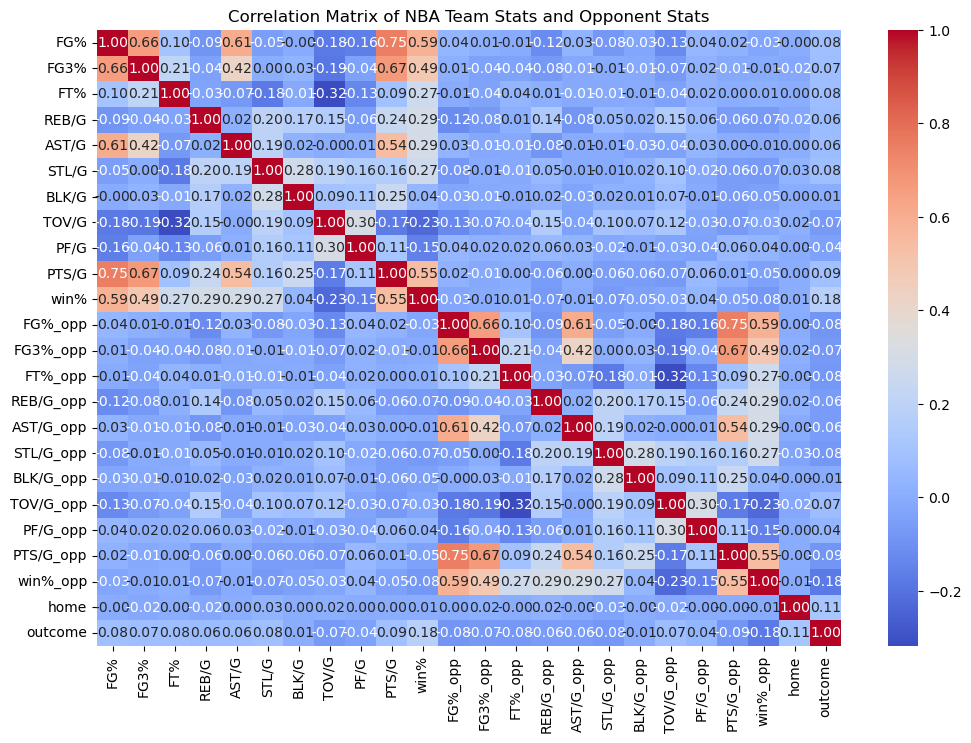

In [20]:
final_df_no_teams = final_df.drop(columns=['team', 'opponent', 'date'])
plt.figure(figsize=(12, 8))
corr = final_df_no_teams.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of NBA Team Stats and Opponent Stats')
plt.show()

In [21]:
X = final_df.drop(['team', 'opponent', 'outcome', 'date'], axis = 1)
Y = final_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

/Users/thossain64/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

train_accuracy = np.mean(train_preds == y_train)
test_accuracy = np.mean(test_preds == y_test)
print(train_accuracy)
print(test_accuracy)

0.6138107416879796
0.5867346938775511


/Users/thossain64/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 5)
rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

rf_train_accuracy = np.mean(rf_train_preds == y_train)
rf_test_accuracy = np.mean(rf_test_preds == y_test)
print(rf_train_accuracy)
print(rf_test_accuracy)

0.7647058823529411
0.5943877551020408
